# Predicting Stroke Risk: Exploratory Data Analysis (EDA)

In this notebook, we explore the health and demographic data of over 5,000 individuals to uncover potential patterns and risk factors that are associated with stroke. By analyzing both numerical and categorical features, we aim to identify the most important predictors that might inform our future classification model.


In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sb_utils import save_file

In [22]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [23]:
df= pd.read_csv('/Users/manuelramirez/Documents/stroke-risk-capstone/stroke_data_clean.csv')

##  Overview of the Dataset

The dataset contains **5,110 observations** across **12 features**, including medical indicators (e.g., glucose level, BMI), demographics (e.g., age, gender, work type), and the target variable: whether the person has had a **stroke** (`stroke`).


In [24]:
#summary stats table transposed for df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


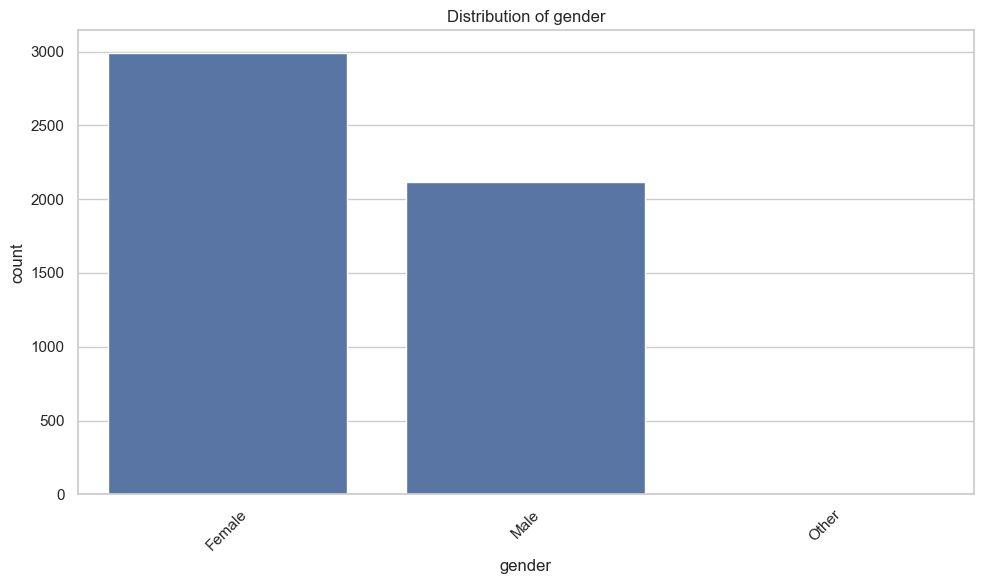

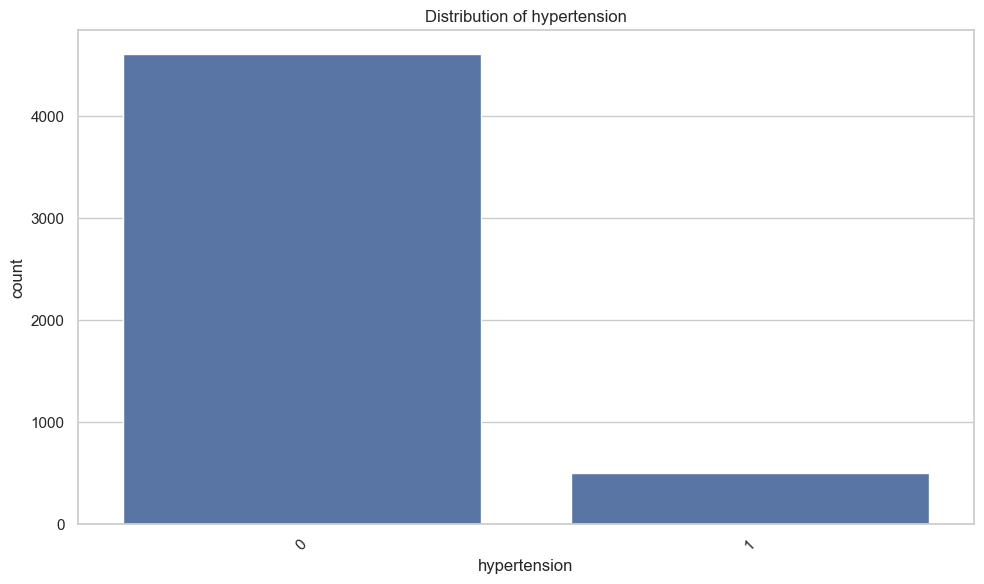

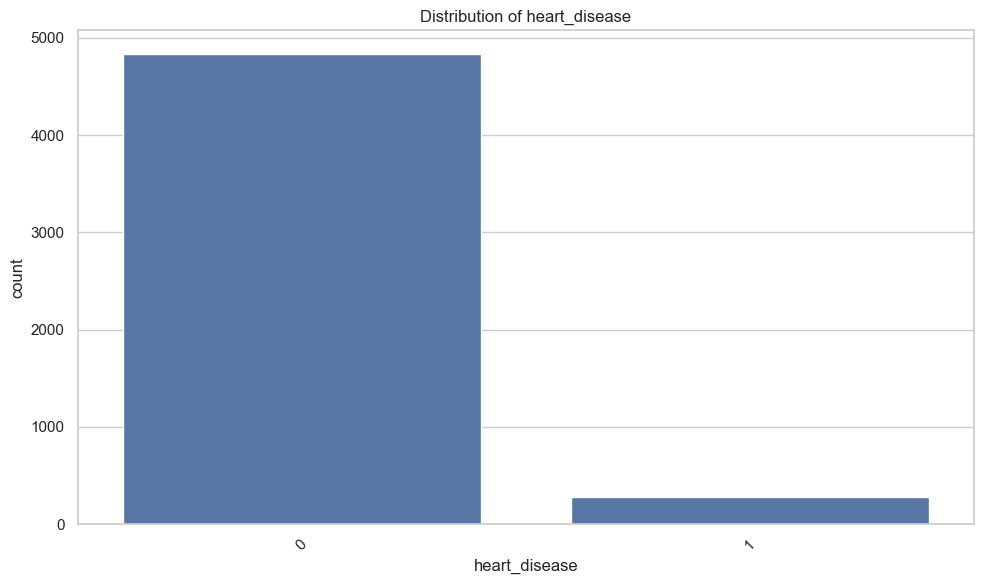

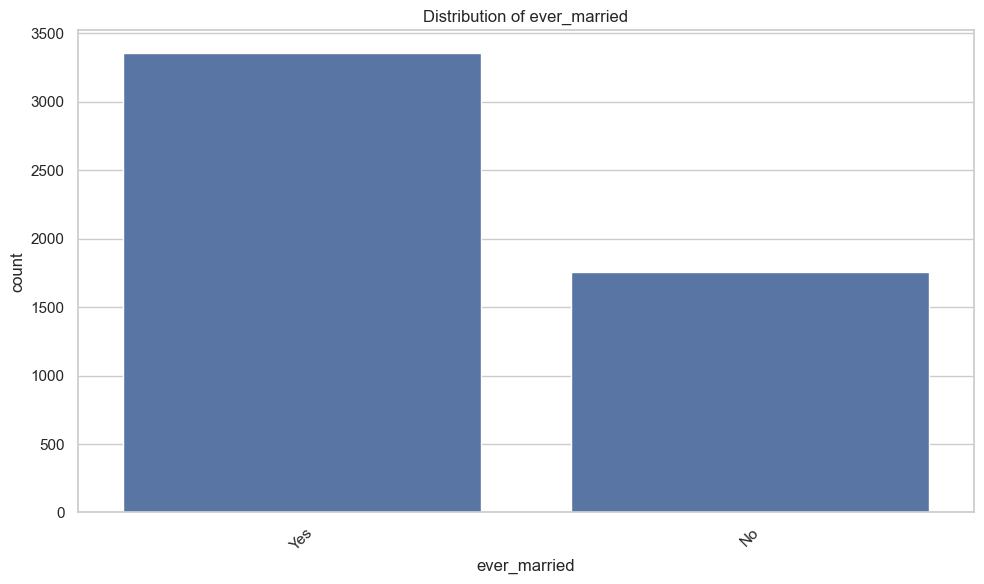

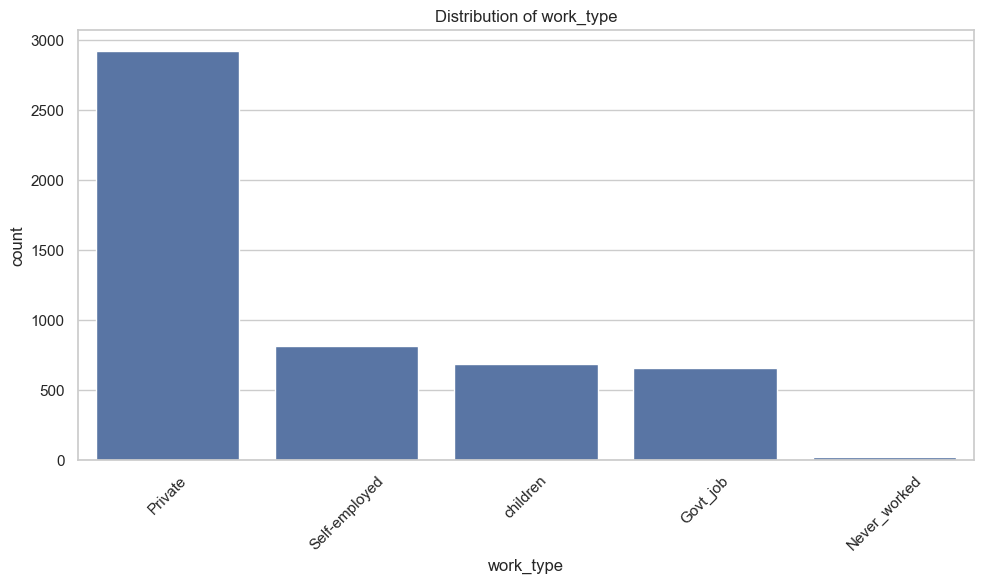

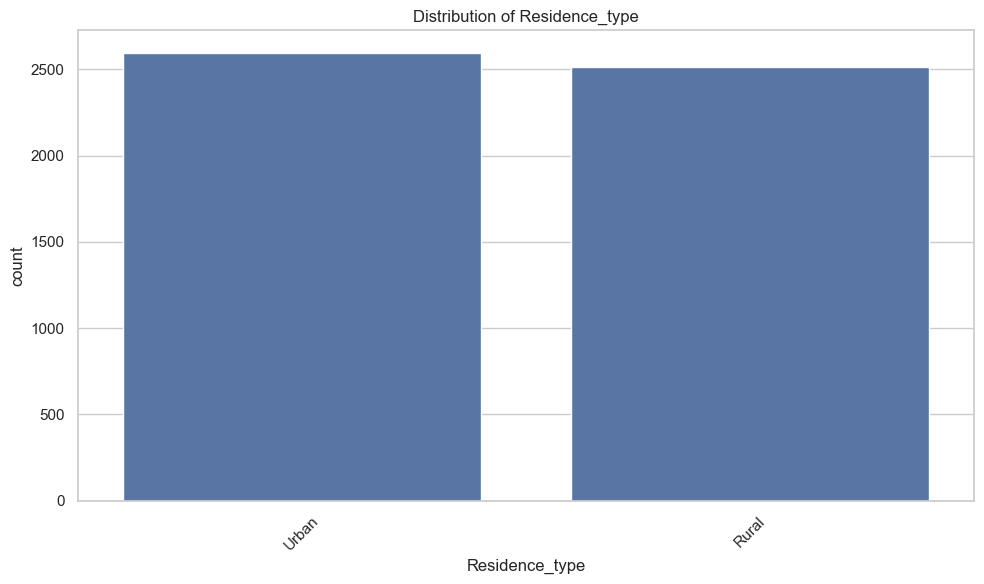

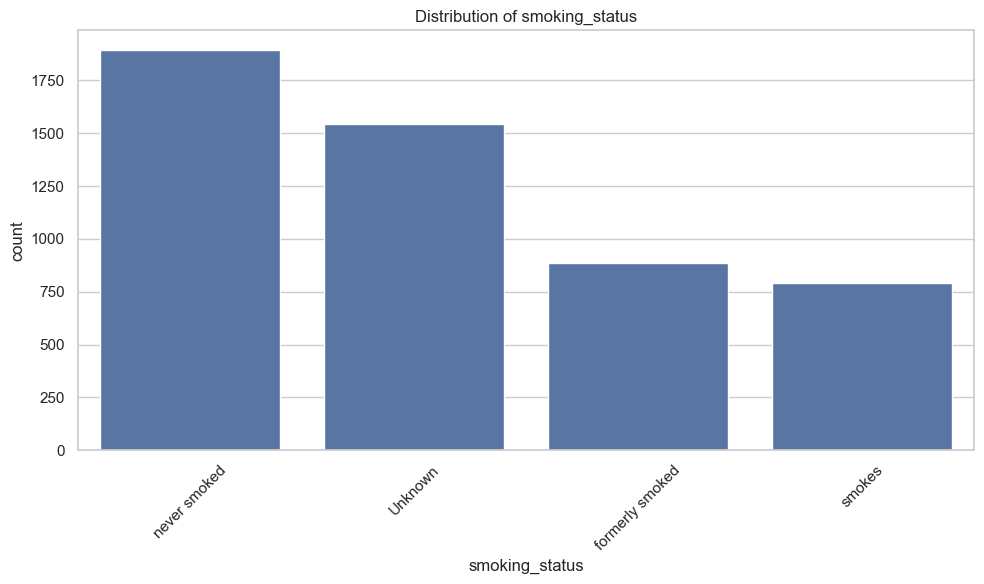

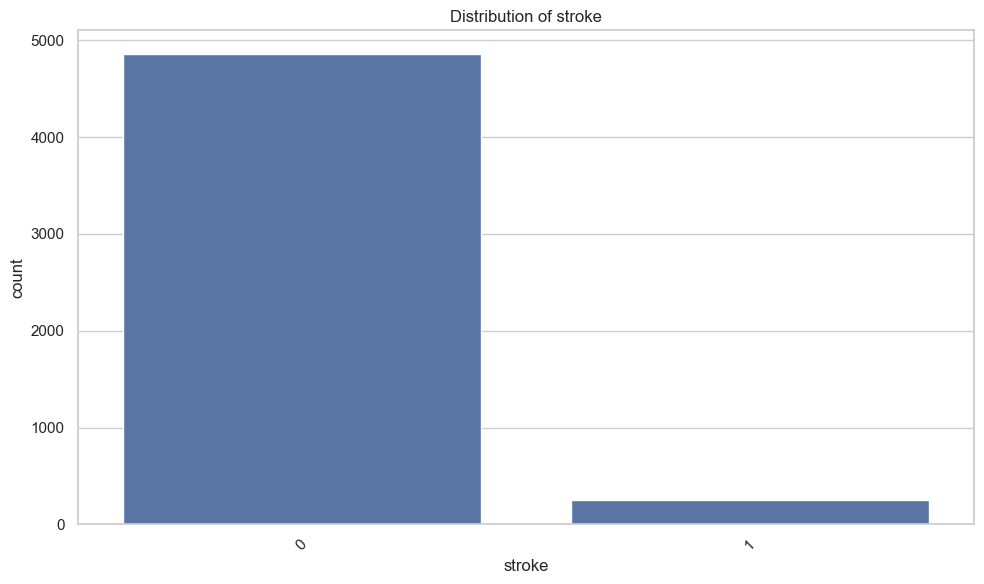

In [28]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status', 'stroke']

numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Categorical distributions
for col in categorical_features:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Numerical Feature Distributions

We first visualize the distributions of key numerical features:
- `age`
- `avg_glucose_level`
- `bmi`

**Key Insights:**
- **Age** is right-skewed with a larger elderly population.
- **Average glucose level** shows outliers with extremely high values.
- **BMI** is approximately normally distributed but has some notable high-end outliers.


###  Univariate Analysis: Numerical Features

We visualize the distributions of key numerical features:
- **Age**: Helps spot age groups most represented in the dataset.
- **Average Glucose Level**: May indicate diabetic trends.
- **BMI**: Allows us to explore patterns in body mass related to stroke.

The KDE curves give a smoothed view of each distribution.


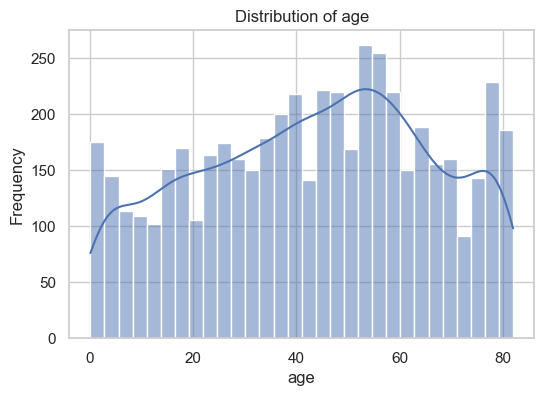

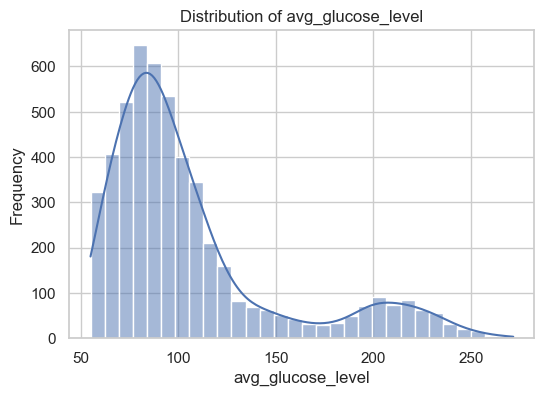

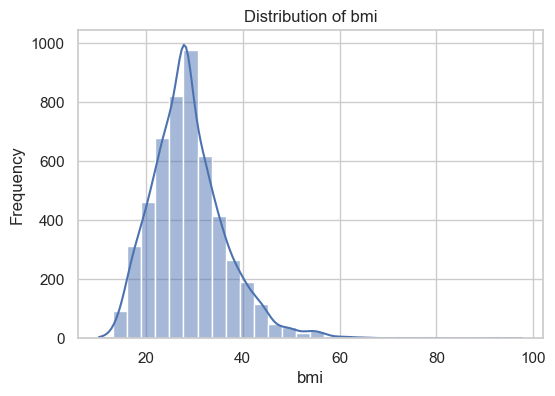

In [29]:
# Numerical columns
num_columns = ['age', 'avg_glucose_level', 'bmi']

# Histograms to understand distributions
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Bivariate Analysis: Numerical Features vs Stroke

These box plots compare the distributions of numerical features for patients with and without stroke. This helps us assess:
- Whether stroke patients have significantly different glucose levels or BMI.
- Whether age appears to be a strong indicator of stroke risk.


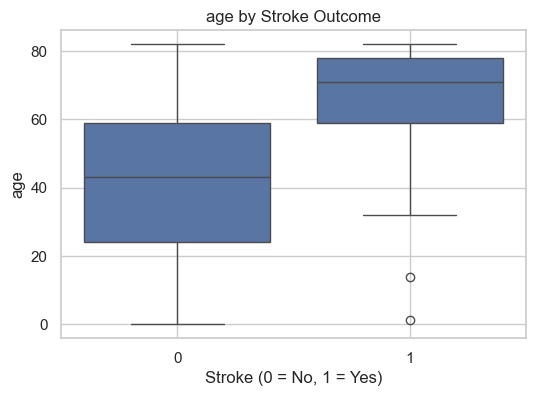

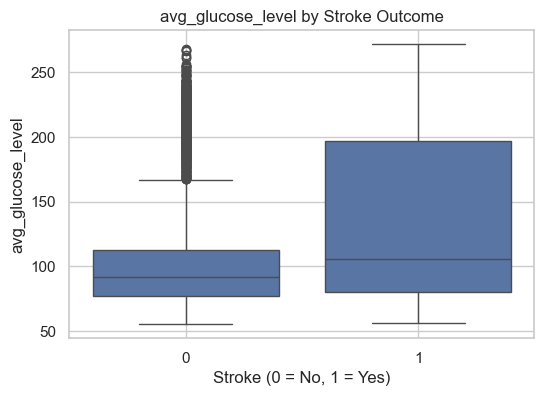

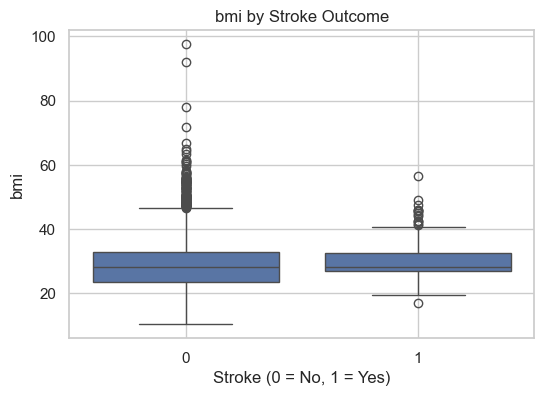

In [30]:
# Box plots to compare distributions by stroke outcome
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} by Stroke Outcome')
    plt.xlabel('Stroke (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


### Categorical Features vs Stroke

We use count plots to visualize how the stroke variable varies across different categories. This helps reveal:
- Higher stroke prevalence in patients with heart disease or hypertension.
- Differences in stroke outcomes based on smoking status, work type, or marital status.


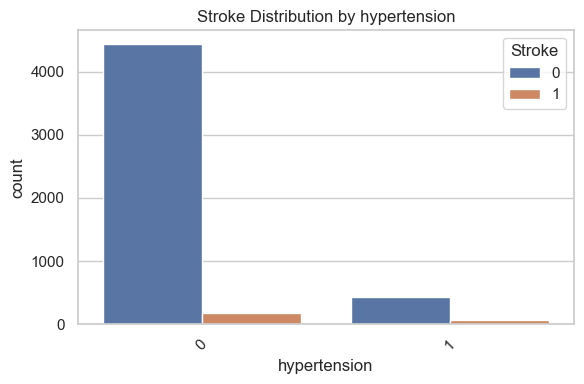

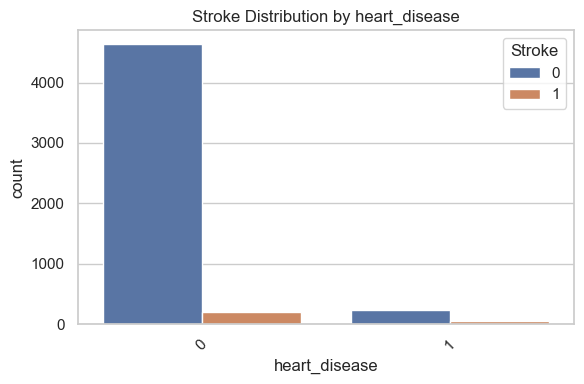

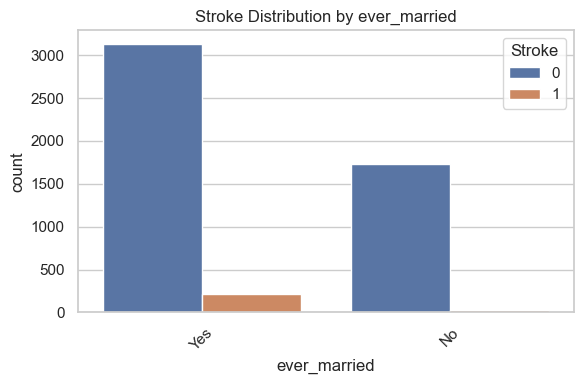

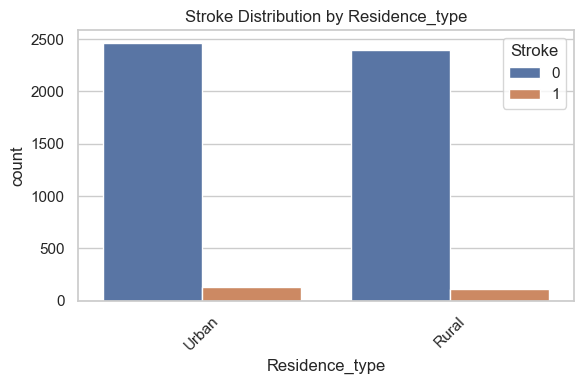

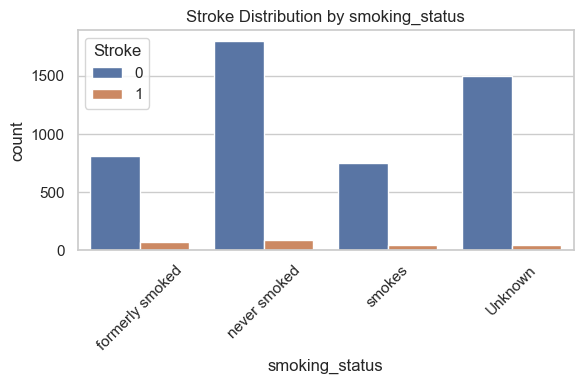

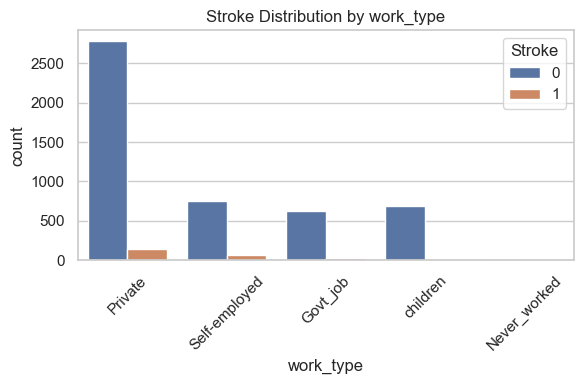

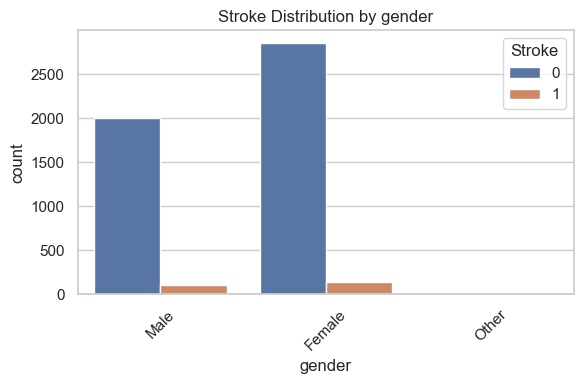

In [31]:
cat_columns = ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'work_type', 'gender']

for col in cat_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {col}')
    plt.xticks(rotation=45)
    plt.legend(title='Stroke')
    plt.tight_layout()
    plt.show()


### Correlation Matrix

We calculate the Pearson correlation coefficient between numeric features to identify linear relationships. Strong correlations may indicate redundancy or multicollinearity. The target variable `stroke` is also included to identify key predictors.


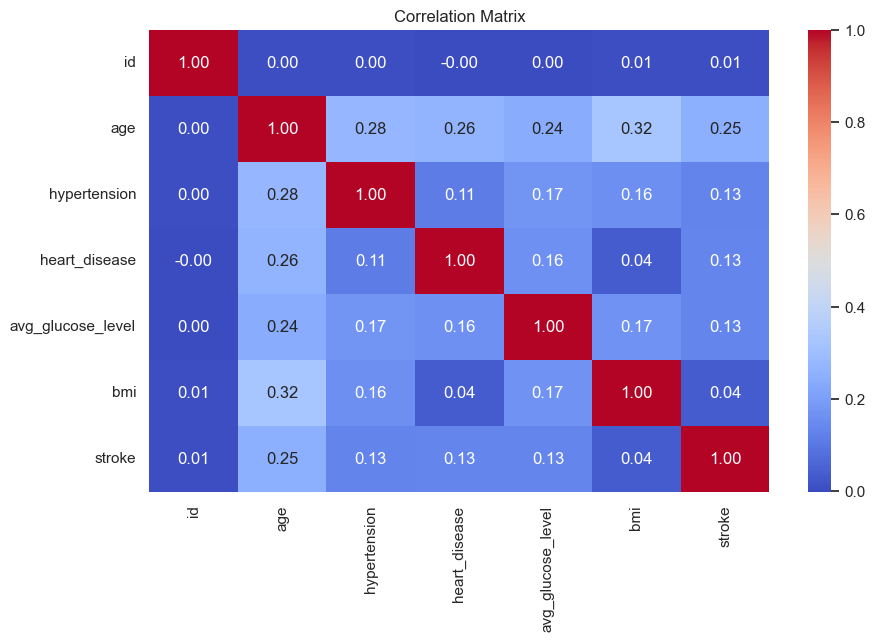

In [32]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Inferential Statistics

We use the Chi-Square test to evaluate whether **hypertension** and **heart disease** are statistically associated with stroke.

- **Null Hypothesis (H₀)**: Stroke is independent of the condition.
- **Alternative Hypothesis (H₁)**: Stroke depends on the condition.

Low p-values (e.g., < 0.05) suggest we can reject the null hypothesis and consider these features significant.


In [33]:
from scipy.stats import chi2_contingency

# Chi-square test: Stroke vs Hypertension
hypertension_ct = pd.crosstab(df['hypertension'], df['stroke'])
chi2_ht, p_ht, _, _ = chi2_contingency(hypertension_ct)

# Chi-square test: Stroke vs Heart Disease
heart_ct = pd.crosstab(df['heart_disease'], df['stroke'])
chi2_hd, p_hd, _, _ = chi2_contingency(heart_ct)

print(f'P-value for Hypertension vs Stroke: {p_ht:.4f}')
print(f'P-value for Heart Disease vs Stroke: {p_hd:.4f}')


P-value for Hypertension vs Stroke: 0.0000
P-value for Heart Disease vs Stroke: 0.0000
